In [1]:
import dynamics_analysis as da
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np

%load_ext autoreload
%autoreload 2

In [2]:
path = '../../data_fortran/MPOL_DCT_85/data/'
paramchar_n1= "nl2_wc5.500_n1_1_E0.10E-09_dtadd0.85_ar0.0_wq5.000_g0.050_gam0.016000_nm250_mr0.00_p0.5E-05_bw1.500_bc5.250_wd5.500_ad0.037_anh159.155_dt0.0100_errl0.1E-03_qb1_cv0.0_tmax80"
dyn_n1 = da.dynamics(2,path, paramchar_n1)

paramchar_n2 = "nl2_wc5.500_n2_2_E0.10E-08_dtadd0.01_ar0.0_wq5.000_g0.050_gam0.016000_nm250_mr0.00_p0.5E-05_bw1.500_bc5.250_wd5.500_ad0.037_anh159.155_dt0.0120_errl0.1E-03_qb1_cv0.0_tmax80"
dyn_n2 = da.dynamics(2,path, paramchar_n2)

paramchar_n33 = "nl2_wc5.500_n2_40_E0.10E-08_dtadd1.80_ar0.0_wq5.000_g0.050_gam0.016000_nm250_mr0.00_p0.5E-05_bw1.500_bc5.250_wd5.500_ad0.037_anh159.155_dt0.0100_errl0.1E-03_qb1_cv0.0_tmax80"
dyn_n33 = da.dynamics(2,path, paramchar_n33)

paramchar_n44 = "nl2_wc5.500_n2_50_E0.10E-09_dtadd1.65_ar0.0_wq5.000_g0.050_gam0.016000_nm250_mr0.00_p0.5E-05_bw1.500_bc5.250_wd5.500_ad0.037_anh159.155_dt0.0100_errl0.1E-03_qb1_cv0.0_tmax80"
dyn_n44 = da.dynamics(2,path, paramchar_n44)

paramchar_cal_cav1 = "nl2_wc5.500_n1_1_E0.10E-09_dtadd0.85_ar0.0_wq5.000_g0.000_gam0.016000_nm250_mr0.00_p0.5E-05_bw1.500_bc5.250_wd5.500_ad0.000_anh159.155_dt0.0100_errl0.1E-03_qb1_cv1.0_tmax80"
dyn_cal_cav1 = da.dynamics(2,path, paramchar_cal_cav1)

path = '../../data_fortran/MPOL_DCT_92/data/'
paramchar_n58 = "nl2_wc5.500_n2_70_E0.10E-09_dtadd1.00_1.70_10_ar0.0_wq5.000_g0.050_gam0.016000_nm250_mr0.00_p0.5E-05_bw1.500_bc5.250_wd5.500_ad0.037_anh159.155_dt0.0100_errl0.1E-03_lsfe14_qb1_cv0.0_tmax80"
dyn_n58 = da.dynamics(2,path, paramchar_n58)

## Decay rate calibration


-- fitted decay rate/(2*np.pi) = 0.009983833941564886 GHz


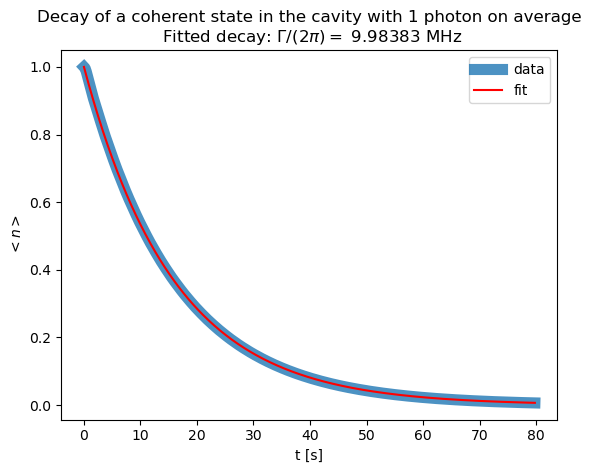

In [3]:
from scipy.optimize import curve_fit

def exp_decay(t,gamma):
    return np.exp( -gamma*t )

opt, _ = curve_fit( exp_decay, dyn_cal_cav1.times, dyn_cal_cav1.nk[:,0] )
Gamma=opt[0]

print( '-- fitted decay rate/(2*np.pi) =', Gamma/(2*np.pi), "GHz" )

plt.plot( dyn_cal_cav1.times[1:], dyn_cal_cav1.nk[1:,0], linewidth=8, alpha=0.8,label='data'  )
plt.plot( dyn_cal_cav1.times[1:], exp_decay( dyn_cal_cav1.times[1:], opt[0]), c='red', label='fit'  )
plt.ylabel( "$<n>$" )
plt.xlabel('t [s]')
plt.title('Decay of a coherent state in the cavity with 1 photon on average\n Fitted decay: $\Gamma/(2\pi)=$ '+str(np.round(1e3*Gamma/(2*np.pi),5))+' MHz')
plt.legend()

## CAVITY PHOTON NUMBER and ERROR versus time

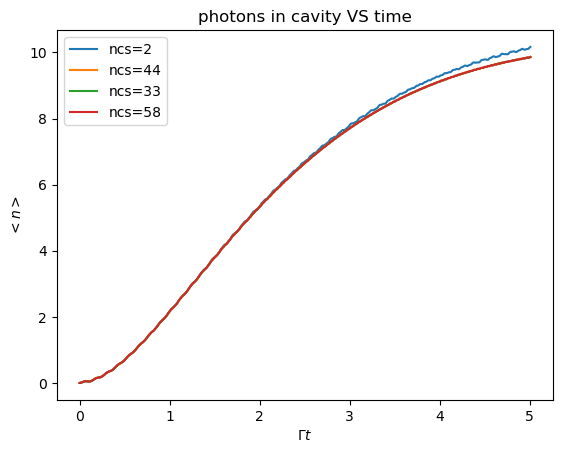

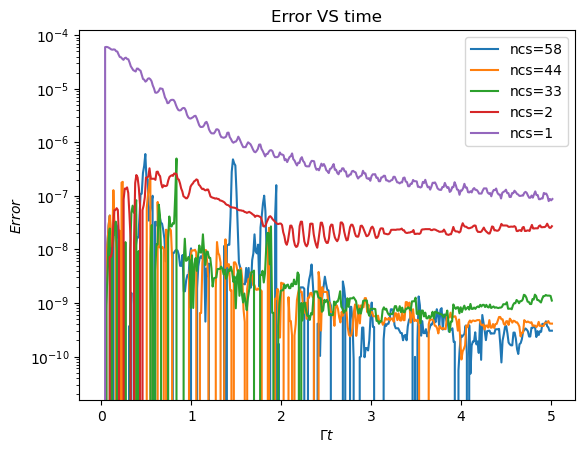

In [4]:
plt.plot( dyn_n2.times*Gamma, dyn_n2.nk[:,0], label='ncs=2'  )
plt.plot( dyn_n44.times*Gamma, dyn_n44.nk[:,0], label='ncs=44'  )
plt.plot( dyn_n33.times*Gamma, dyn_n33.nk[:,0], label='ncs=33'  )
plt.plot( dyn_n58.times*Gamma, dyn_n58.nk[:,0], label='ncs=58'  )
plt.ylabel( "$<n>$" )
plt.xlabel( "$\Gamma t$" )
plt.title( "photons in cavity VS time"  )
plt.legend()
plt.show()

plt.plot( dyn_n58.times*Gamma, dyn_n58.error, label='ncs=58'  )
plt.plot( dyn_n44.times*Gamma, dyn_n44.error, label='ncs=44'  )
plt.plot( dyn_n33.times*Gamma, dyn_n33.error, label='ncs=33'  )
plt.plot( dyn_n2.times*Gamma, dyn_n2.error, label='ncs=2'  )
plt.plot( dyn_n1.times*Gamma, dyn_n1.error, label='ncs=1'  )
plt.ylabel( "$Error$" )
plt.xlabel( "$\Gamma t$" )
plt.title( "Error VS time"  )
plt.yscale( 'log' )
plt.legend()
plt.show()

## **Bath photon spectrum**

(0.0, 0.005)

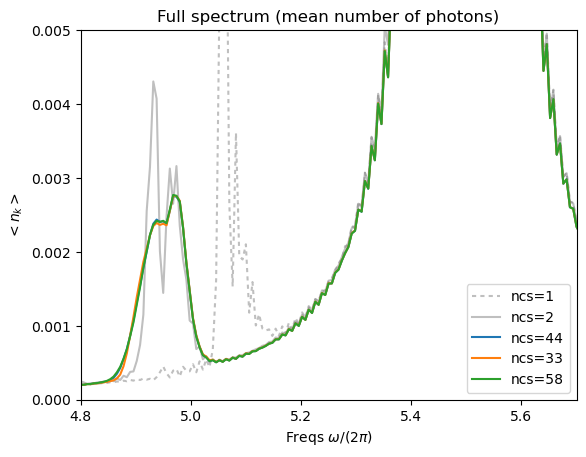

In [5]:
plt.plot( dyn_n1.wk/(2*(np.pi)), dyn_n1.nk[-1,1:], label='ncs=1' , c='gray',alpha=0.5, dashes=[2,2,2,2] )
plt.plot( dyn_n2.wk/(2*(np.pi)), dyn_n2.nk[-1,1:], label='ncs=2' , c='gray',alpha=0.5 )
plt.plot( dyn_n44.wk/(2*(np.pi)), dyn_n44.nk[-1,1:], label='ncs=44'  )
plt.plot( dyn_n33.wk/(2*(np.pi)), dyn_n33.nk[-1,1:], label='ncs=33'  )
plt.plot( dyn_n58.wk/(2*(np.pi)), dyn_n58.nk[-1,1:], label='ncs=58'  )

plt.title( "Full spectrum (mean number of photons)"  )
plt.xlabel( "Freqs $\omega/(2\pi)$"  )
plt.ylabel( "$<n_k>$" )
plt.legend()

plt.xlim(4.8,5.7)
plt.ylim( 0,0.005 )

In [17]:
dyn_n44.final_state.renyi_entropy(0)

0.512166025736808

# **Spectrum decomposition**

To study the nature of the emitted radiation, we
analyze the spectrum in terms of Fock states $| N \rangle$.  First,
consider the general expansion of our multi-mode
wavefunction in terms of number states, where the coefficients are to be determined:

\begin{eqnarray}
|\Psi\rangle & = &\gamma |0\rangle + \sum_k \alpha_k a_k^\dagger |0\rangle
+ \sum_{k_1,k_2} \alpha_{k_1,k_2} a_{k_1}^\dagger a_{k_2}^\dagger |0\rangle \notag \\ 
&& + \sum_{k_1,k_2,k_3} \alpha_{k_1,k_2,k_3} a_{k_1}^\dagger a_{k_2}^\dagger a_{k_3}^\dagger |0\rangle 
+...
\end{eqnarray}

It can then easily be verified that the 1-photon amplitude is given by:

\begin{equation}
\alpha_k = \langle0| a_k |\Psi\rangle = \sum_n p_n f_{k,n} \langle0 | f_n\rangle,
\label{alpha1photon}
\end{equation}
and that the scattering amplitude for a generic $N$-photon state is:

\begin{equation}
\label{fock_amplitude}
\alpha_{k_1,...,k_N} = \frac {1}{N!} \langle0| a_{k_1} ...\ a_{k_N} |\Psi\rangle,
\end{equation}

which can be obtained straightforwardly from the algebraic identities of coherent states. 
From the multi-photon amplitudes, we can then compute the probability 
distribution for finding a photon in a given $k$ mode, according to the
various Fock contents of the total wavefunction:

\begin{eqnarray}
\langle n_k\rangle_{1photon} &=& |\alpha_{k}|^2 \notag, \\
\langle n_k\rangle_{2photon} &=& 4 \sum_{k1} |\alpha_{k,k1}|^2 \notag, \\
\langle n_k\rangle_{3photon} &=& 18 \sum_{k2,k3} |\alpha_{k,k2,k3}|^2.
\end{eqnarray}

In [5]:
one_photon_nk = dyn_n44.final_state.one_photon_k_nb()
two_photon_nk = dyn_n44.final_state.two_photon_k_nb()
three_photon_nk = dyn_n44.final_state.three_photon_k_nb()

(0.0, 1e-10)

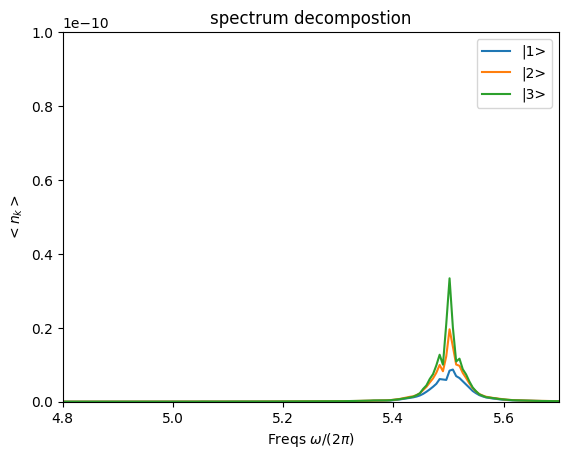

In [15]:
#plt.plot( dyn_n33.wk/(2*(np.pi)), dyn_n33.nk[-1,1:], label='<n_k>'  )
plt.plot( dyn_n44.wk/(2*(np.pi)), one_photon_nk[1:], label='|1>'  )
plt.plot( dyn_n44.wk/(2*(np.pi)), two_photon_nk[1:], label='|2>'  )
plt.plot( dyn_n44.wk/(2*(np.pi)), three_photon_nk[1:], label='|3>'  )
plt.title( "spectrum decompostion"  )
plt.xlabel( "Freqs $\omega/(2\pi)$"  )
plt.ylabel( "$<n_k>$" )
plt.legend()
plt.xlim(4.8,5.7)
plt.ylim( 0,1e-10 )

# **Applying destruction operator at 4.95 GHz**

In [34]:
target_mode=75
print("-- Frequency of mode number "+str(target_mode)+ ' =',dyn_n44.wk[ target_mode ]/(2*np.pi))

-- Frequency of mode number 75 = 4.95


In [35]:
a_st_n44 = deepcopy( dyn_n44.final_state )
a_st_n44.destroy_k(target_mode)
tot_photon_nk_n44 = dyn_n44.final_state.tot_photon_k_nb()
a_tot_photon_nk_n44 = a_st_n44.tot_photon_k_nb()

a_st_n58 = deepcopy( dyn_n58.final_state )
a_st_n58.destroy_k(target_mode)
tot_photon_nk_n58 = dyn_n58.final_state.tot_photon_k_nb()
a_tot_photon_nk_n58 = a_st_n58.tot_photon_k_nb()

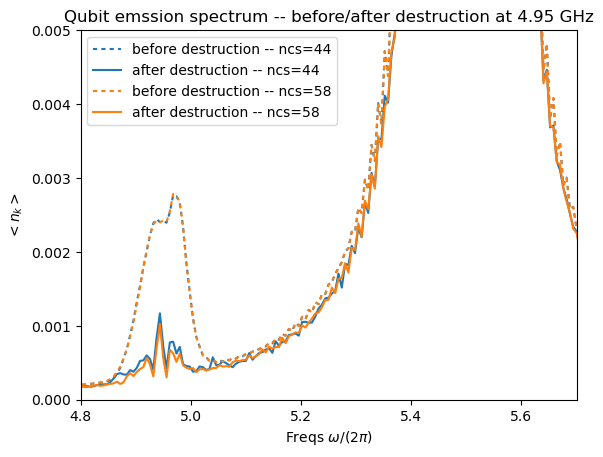

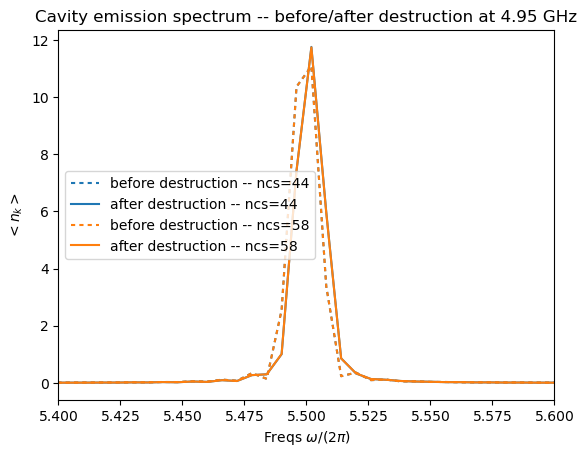

In [36]:
plt.plot( dyn_n44.wk/(2*(np.pi)), tot_photon_nk_n44[1:],c='C0',dashes=[2,2,2,2], label='before destruction -- ncs=44'  )
plt.plot( dyn_n44.wk/(2*(np.pi)), a_tot_photon_nk_n44[1:],c='C0', label='after destruction -- ncs=44'  )
plt.plot( dyn_n58.wk/(2*(np.pi)), tot_photon_nk_n58[1:],c='C1',dashes=[2,2,2,2], label='before destruction -- ncs=58'  )
plt.plot( dyn_n58.wk/(2*(np.pi)), a_tot_photon_nk_n58[1:],c='C1', label='after destruction -- ncs=58'  )
plt.title( "Qubit emssion spectrum -- before/after destruction at 4.95 GHz"  )
plt.xlabel( "Freqs $\omega/(2\pi)$"  )
plt.ylabel( "$<n_k>$" )
plt.xlim(4.8,5.7)
plt.ylim( 0,0.005 )
plt.legend()
plt.show()

plt.plot( dyn_n44.wk/(2*(np.pi)), tot_photon_nk_n44[1:],c='C0',dashes=[2,2,2,2], label='before destruction -- ncs=44'  )
plt.plot( dyn_n44.wk/(2*(np.pi)), a_tot_photon_nk_n44[1:],c='C0', label='after destruction -- ncs=44'  )
plt.plot( dyn_n58.wk/(2*(np.pi)), tot_photon_nk_n58[1:],c='C1',dashes=[2,2,2,2], label='before destruction -- ncs=58'  )
plt.plot( dyn_n58.wk/(2*(np.pi)), a_tot_photon_nk_n58[1:],c='C1', label='after destruction -- ncs=58'  )
plt.title( "Cavity emission spectrum -- before/after destruction at 4.95 GHz"  )
plt.xlabel( "Freqs $\omega/(2\pi)$"  )
plt.ylabel( "$<n_k>$" )
plt.xlim(5.4,5.6)
plt.legend()
plt.show()

# **Wigner function of the final state**

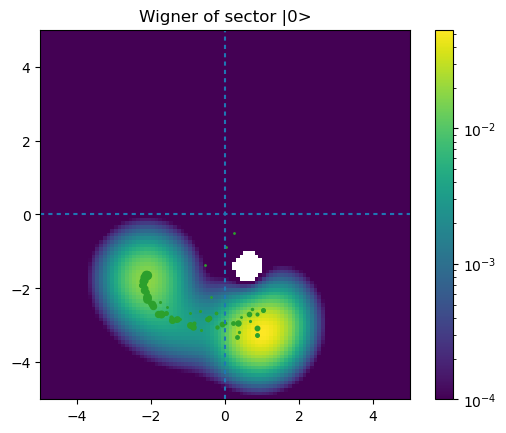

In [40]:
plt.title('Wigner of sector |0>')
dyn_n58.plot_split_wigner(0, xmin=-5, log_min=0.0001)

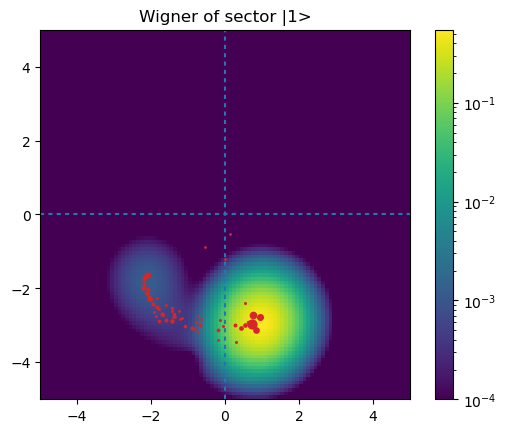

In [26]:
plt.title('Wigner of sector |1>')
dyn_n58.plot_split_wigner(1, xmin=-5, log_min=0.0001 )#, log_min=0.001)

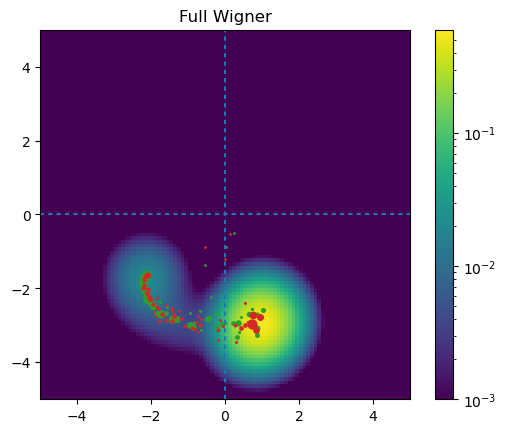

In [27]:
plt.title('Full Wigner')
dyn_n58.plot_wigner( xmin=-5 , log_min=0.001)